# <span style="color:darkblue"> QTM 151 Final Project </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here

print("Daisy Cossio Garcia")


Daisy Cossio Garcia


<font size = "5">

Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime 
import numpy as np


<font size = "5">

import datasets

<font size = "3">

- Look over them and figure out what you want to work with 


In [4]:
circuits = pd.read_csv("data_raw/circuits.csv") 
constructor_results = pd.read_csv("data_raw/constructor_results.csv") 
constructor_standings = pd.read_csv("data_raw/constructor_standings.csv") 
constructors = pd.read_csv("data_raw/constructors.csv") 
drivers_standings = pd.read_csv("data_raw/driver_standings.csv") 
drivers = pd.read_csv("data_raw/drivers.csv") 
lap_times = pd.read_csv("data_raw/lap_times.csv") 
pit_stops = pd.read_csv("data_raw/pit_stops.csv")
qualifying = pd.read_csv("data_raw/qualifying.csv")
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv")        
seasons = pd.read_csv("data_raw/seasons.csv")  
sprint_results = pd.read_csv("data_raw/sprint_results.csv") 
status = pd.read_csv("data_raw/status.csv")   

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


Text(0.5, 1.0, 'Currencies Convert to USD')

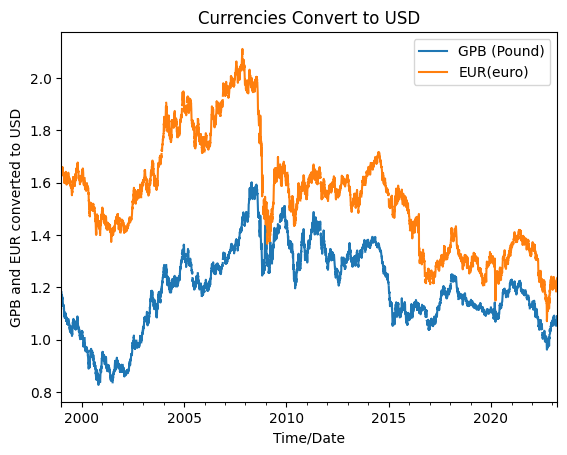

In [59]:
# Write your own code

currencies["date"] = pd.to_datetime(currencies["date_string"])
currencies         = currencies.sort_values("date",ascending = True)

(currencies[["date","gbp_to_usd","eur_to_usd"]]
    .set_index("date").plot())
plt.xlabel("Time/Date")
plt.ylabel("GPB and EUR converted to USD")
plt.legend(["GPB (Pound)","EUR(euro)"])
plt.title("Currencies Convert to USD")

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [60]:
# Write your own code
currencies["diff_euro"] = currencies["eur_to_usd"].diff()
currencies["lag_euro"]    = currencies["eur_to_usd"].shift(1)
currencies["growth_euro"] = currencies["diff_euro"]* 100/currencies["lag_euro"]

display(currencies[["eur_to_usd","lag_euro","diff_euro","growth_euro"]])

,eur_to_usd,lag_euro,diff_euro,growth_euro
0,1.6581,NaN,NaN,NaN
1,1.6566,1.6581,-0.0015,-0.090465
2,1.6547,1.6566,-0.0019,-0.114693
3,1.6495,1.6547,-0.0052,-0.314256
4,1.6405,1.6495,-0.0090,-0.545620
...,...,...,...,...
6320,1.2278,1.2225,0.0053,0.433538
6321,1.2341,1.2278,0.0063,0.513113
6322,1.2313,1.2341,-0.0028,-0.226886
6323,1.2368,1.2313,0.0055,0.446682


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



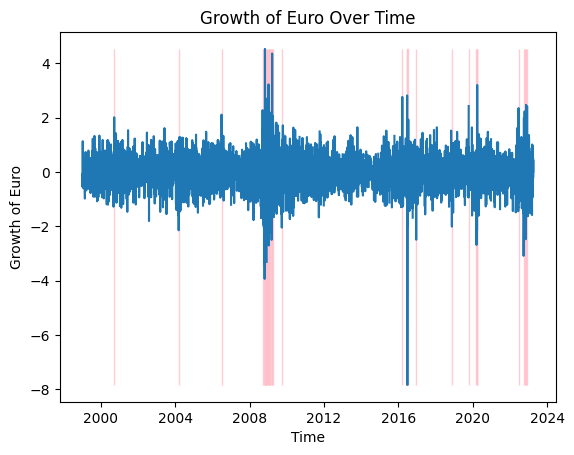

In [61]:
# Write your own code

currencies["bool_cond1"] = currencies["growth_euro"] >2
currencies["bool_cond2"] = currencies["growth_euro"] < -2

plt.plot("date", "growth_euro", data = currencies)
plt.xlabel("Time")
plt.ylabel("Growth of Euro")
plt.title("Growth of Euro Over Time")

vec_y = currencies["growth_euro"]
plt.fill_between(x= currencies["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_cond1"] | currencies["bool_cond2"],  
                 alpha = 0.8,color = "pink")
plt.show()


<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




Text(0.5, 1.0, 'Time of Standard Deviation of The Euro')

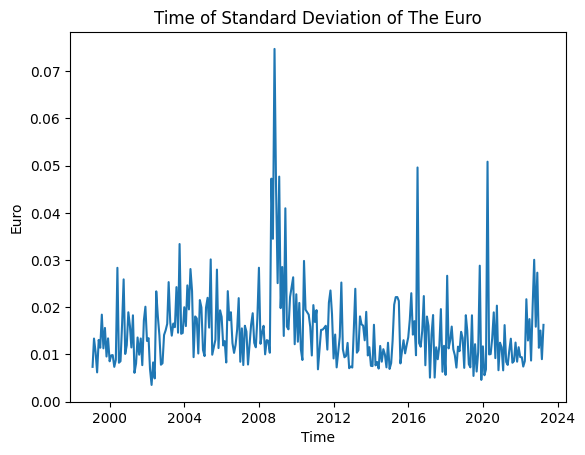

In [62]:
# Write your own code

month_config = pd.Grouper(key='date', freq='m')
monthlydata = (currencies
               .groupby(month_config) 
               .agg(euro_stf = ("eur_to_usd","std"))
               .reset_index())

plt.plot("date","euro_stf",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Euro")
plt.title("Time of Standard Deviation of The Euro")


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [63]:
# Write your own code
currencies_long = pd.melt(currencies,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars='date',
                         value_vars=['eur_to_usd','gbp_to_usd'])

display(currencies_long)


,date,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
